# CS 480/680 assignment 1 (coding part)


- Please save a copy of this notebook to avoid losing your changes.
- Debug your code and ensure that it can run before submission.
- Save the output of each cell. Failure to do so may result in your coding questions not being graded.
- Submit your completed version of this notebook.



## Question 1-2

In this question, you are asked to implement the perceptron algorithm on the Spambase dataset. Please refer to the [dataset webpage](https://archive.ics.uci.edu/ml/datasets/spambase) for details on the dataset, and consult the lecture slides and suggested readings for details on the perceptron algorithm.

- Please note that `is_spam` is the label of the dataset. The labellings are 0/1 instead of -1/1 (which was used for the perceptron covered in class).
- Recording the accuracy after every step may be costly, therefore you can instead record the accuracy every $x$ steps, where $x$ can be 100, 1000, your training set size, 4601 (the size of the dataset), or any other value you find appropriate.
- It is recommended that you split the dataset into training/validation/testing datasets, but we will not deduct marks if you don't.
- You will get full marks for 
    - Correct implementation of the perceptron algorithm
    - An accuracy (on the validation dataset, if you splitted the dataset) vs number of training steps plot that relects the progress of the training
    - Final reported accuracy (on the testing dataset, if you splitted the dataset)

In [1]:
import urllib.request
import pandas as pd
# TODO: add any other package you need
import numpy as np
import matplotlib.pyplot as plt

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
filename = 'spambase.csv'
urllib.request.urlretrieve(url, filename)

# Load the dataset into a Pandas dataframe
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you',
    'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
    'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
    'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
    'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
    'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;',
    'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'is_spam'
]
data = pd.read_csv(filename, names=column_names)


In [2]:
# TODO: your implementation
#print(data.shape)
w = np.zeros(58)  # using trick for hiding the bias term

input_data = np.array(data)  # trans data into np.array
print(input_data.shape)

input_label = input_data[:,57].copy()   # get the labels
input_data[:,57] = np.ones(4601)    # attach 1 to the inputs
training_inputs = input_data[:4001,:]    # split inputs
validation_inputs = input_data[4001:,:]
training_label = input_label[:4001]    # split labels
validation_label = input_label[4001:]

# use to plot the accuracy
x_ax = []
y_ax = []


# predict with the currect w
def predict(x):
    summ = np.dot(x,w)
    result = 1 if summ > 0 else 0
    return result


for i in range(1000):
    # training
    for x, res in zip(training_inputs, training_label):
        current_label = predict(x)
        w = w + (res - current_label) * x
        
    # collect the accuracy after iterating the whole training set each time
    tot = 0
    correct = 0
    
    for x, res in zip(validation_inputs, validation_label):
        current_label = predict(x)
        tot = tot + 1
        if res==current_label:
            correct = correct + 1
    accuracy = correct / tot
    
    y_ax.append(accuracy)
    x_ax.append(i*4001)
    


(4601, 58)


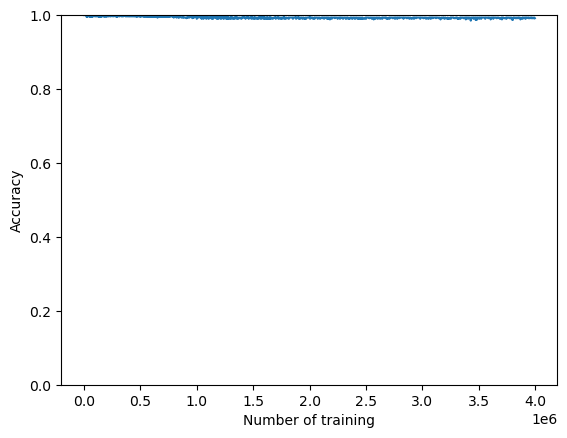

In [3]:
# TODO: plot the accuracy against the number of steps
# TODO: report the final accuracy
plt.plot(x_ax,y_ax)
plt.xlabel('Number of training')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.show()